### 📊 Benchmark de Números Primos com OpenMP
#### Autor: Poliana Ellen de Araújo
##### Descrição: Análise gráfica dos tempos de execução do programa de contagem de números primos (Sequencial vs Paralelo)

In [2]:
# primos_parallel.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Carregar os resultados do CSV
df = pd.read_csv("resultados.csv")

# ✅ Verificar as primeiras linhas
df.head()


,Tipo,N,Threads,TotalPrimos,Tempo
0,Sequencial,1,1,0,0.000000
1,Sequencial,10,1,4,0.000001
2,Sequencial,100,1,25,0.000003
3,Sequencial,1000,1,168,0.000024
4,Sequencial,10000,1,1229,0.000402


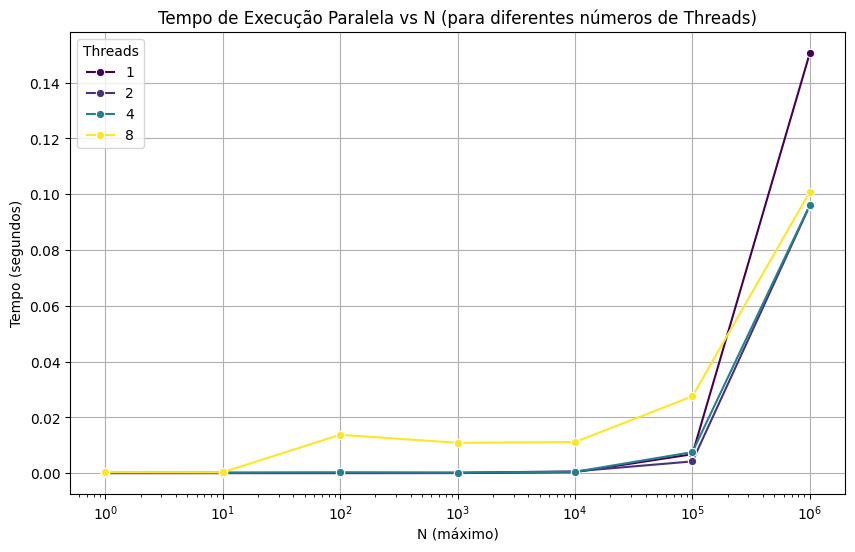

In [2]:
# Gráfico só com a versão Paralela
df_paralelo = df[df['Tipo'] == 'Paralelo']

plt.figure(figsize=(10,6))
sns.lineplot(data=df_paralelo, x='N', y='Tempo', hue='Threads', marker='o', palette='viridis')

plt.xscale('log')  # Escala logarítmica no eixo X

plt.title('Tempo de Execução Paralela vs N (para diferentes números de Threads)')
plt.xlabel('N (máximo)')
plt.ylabel('Tempo (segundos)')
plt.legend(title='Threads')
plt.grid(True)
plt.show()


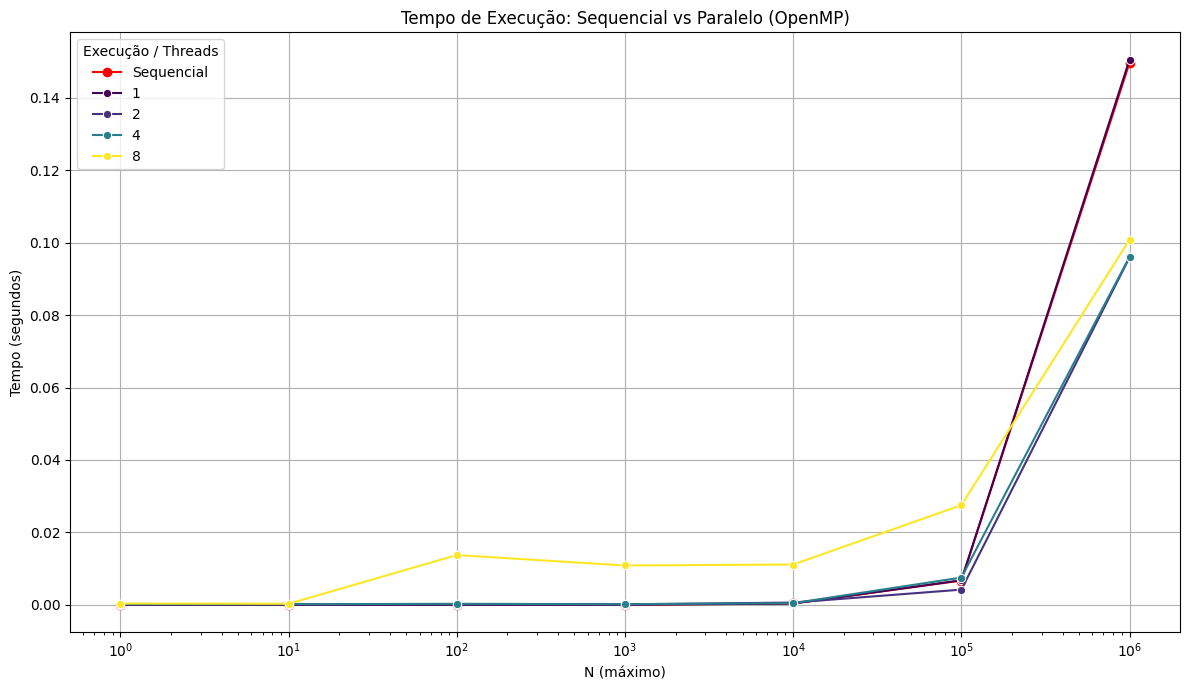

In [ ]:
# Gráfico com Sequencial e Paralelo juntos
plt.figure(figsize=(12,7))

df = pd.read_csv("resultados.csv")

# Versão Sequencial
df_seq = df[df['Tipo'] == 'Sequencial']
plt.plot(df_seq['N'], df_seq['Tempo'], 'o-', color='red', label='Sequencial')

# Versões Paralelas (usando seaborn)
df_paralelo = df[df['Tipo'] == 'Paralelo']
sns.lineplot(data=df_paralelo, x='N', y='Tempo', hue='Threads', marker='o', palette='viridis')

# Configurações do gráfico
plt.xscale('log')   # Escala logarítmica no eixo X
plt.title('Tempo de Execução: Sequencial vs Paralelo (OpenMP)')
plt.xlabel('N (máximo)')
plt.ylabel('Tempo (segundos)')
plt.legend(title='Execução / Threads')
plt.grid(True)
plt.tight_layout()
plt.show()

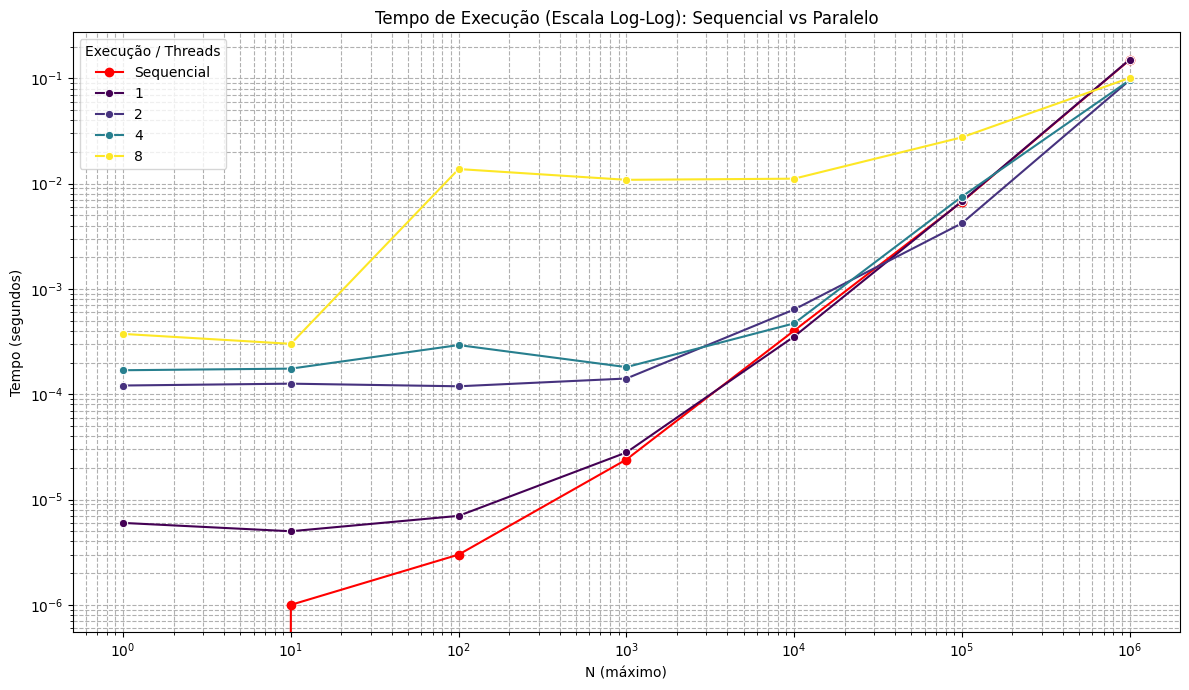

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' é seu DataFrame carregado a partir do CSV
df = pd.read_csv('resultados.csv') 

plt.figure(figsize=(12, 7))

# Versão Sequencial
df_seq = df[df['Tipo'] == 'Sequencial']
plt.plot(df_seq['N'], df_seq['Tempo'], 'o-', color='red', label='Sequencial')

# Versões Paralelas
df_paralelo = df[df['Tipo'] == 'Paralelo']
sns.lineplot(data=df_paralelo, x='N', y='Tempo', hue='Threads', marker='o', palette='viridis')

# Configurações do gráfico
plt.xscale('log')
plt.yscale('log')  # <-- MUDANÇA PRINCIPAL AQUI
plt.title('Tempo de Execução (Escala Log-Log): Sequencial vs Paralelo')
plt.xlabel('N (máximo)')
plt.ylabel('Tempo (segundos)')
plt.legend(title='Execução / Threads')
plt.grid(True, which="both", ls="--") # Grade para ambas as escalas
plt.tight_layout()
plt.show()

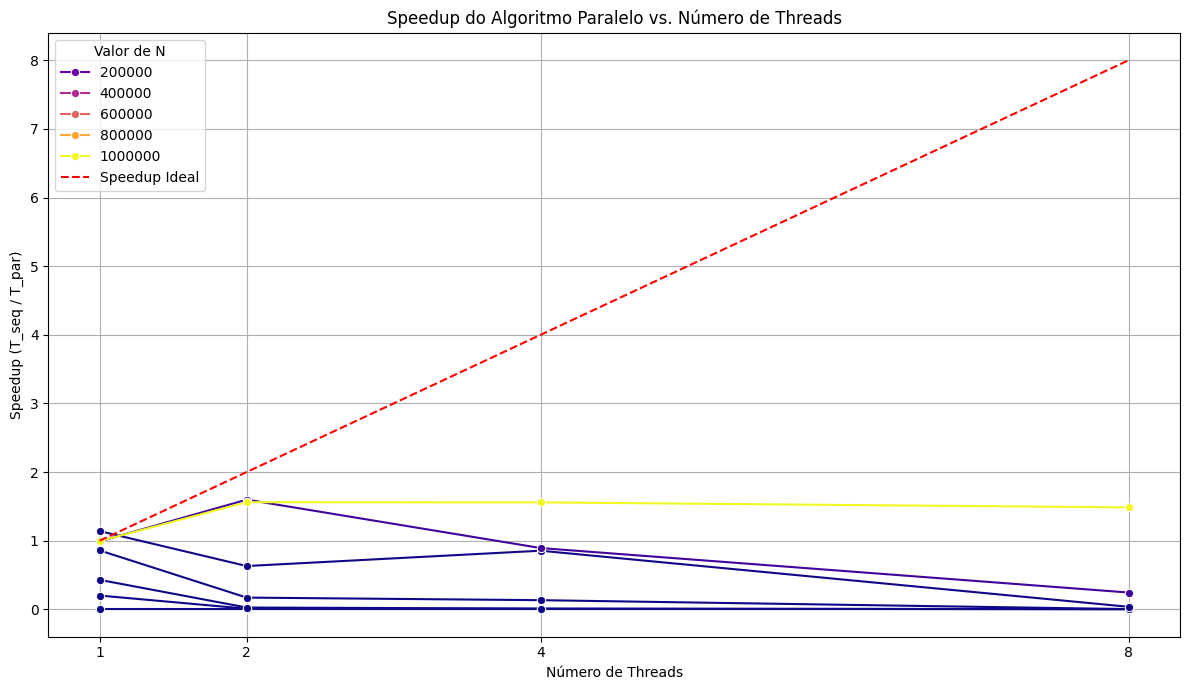

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' é seu DataFrame
df = pd.read_csv('seus_dados.csv')

# 1. Separar os dados sequenciais para usar como base
df_seq = df[df['Tipo'] == 'Sequencial'][['N', 'Tempo']].rename(columns={'Tempo': 'Tempo_Seq'})

# 2. Juntar os tempos sequenciais com os dados paralelos
df_paralelo = df[df['Tipo'] == 'Paralelo']
df_merged = pd.merge(df_paralelo, df_seq, on='N')

# 3. Calcular o Speedup
df_merged['Speedup'] = df_merged['Tempo_Seq'] / df_merged['Tempo']

# 4. Plotar o Gráfico de Speedup
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_merged, x='Threads', y='Speedup', hue='N', marker='o', palette='plasma')

# Adicionar a linha de Speedup Ideal (Speedup = Nº de Threads)
threads = sorted(df_merged['Threads'].unique())
plt.plot(threads, threads, 'r--', label='Speedup Ideal')

# Configurações do gráfico
plt.title('Speedup do Algoritmo Paralelo vs. Número de Threads')
plt.xlabel('Número de Threads')
plt.ylabel('Speedup (T_seq / T_par)')
plt.xticks(threads) # Forçar ticks para 1, 2, 4, 8
plt.legend(title='Valor de N')
plt.grid(True)
plt.tight_layout()
plt.show()